# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [17]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Importing the necessary libraries

In [20]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [22]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [43]:
# Import the first file - True.csv

true_news = pd.read_csv('True.csv')

# Import the second file - Fake.csv

fake_news = pd.read_csv('Fake.csv')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [47]:
# Inspect the DataFrame with True News to understand the given data

true_news.head()

,title,text,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017"


In [49]:
# Inspect the DataFrame with Fake News to understand the given data

fake_news.head()

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017"


In [51]:
# Print the column details for True News DataFrame
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [53]:
# Print the column details for Fake News Dataframe
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [55]:
# Print the column names of both DataFrames


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [58]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_news['news_label'] = 1

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_news['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [61]:
# Combine the true and fake news DataFrames into a single DataFrame
df = pd.concat([true_news, fake_news], ignore_index=True)

In [63]:
# Display the first 5 rows of the combined DataFrame to verify the result
df.head()

,title,text,date,news_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1


In [65]:
print(f"\nDataFrame shape: {df.shape}")


DataFrame shape: (44940, 4)


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [68]:
# Check Presence of Null Values
print("\nNull values in the dataset:")
print(df.isnull().sum())


Null values in the dataset:
title         21
text          21
date          42
news_label     0
dtype: int64


In [70]:
# Handle Rows with Null Values
df = df.dropna()
print(f"\nDataFrame shape after removing null values: {df.shape}")


DataFrame shape after removing null values: (44898, 4)


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [73]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space

df['news_text'] = df['title'] + ' ' + df['text']

# Drop the irrelevant columns from the DataFrame as they are no longer needed

df = df.drop(['title', 'text', 'date'], axis=1)

# Display the first 5 rows of the updated DataFrame to check the result
print("\nFinal DataFrame structure:")
print(df.head())
print(f"Final DataFrame shape: {df.shape}")



Final DataFrame structure:
   news_label                                          news_text
0           1  As U.S. budget fight looms, Republicans flip t...
1           1  U.S. military to accept transgender recruits o...
2           1  Senior U.S. Republican senator: 'Let Mr. Muell...
3           1  FBI Russia probe helped by Australian diplomat...
4           1  Trump wants Postal Service to charge 'much mor...
Final DataFrame shape: (44898, 2)


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [78]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed

df_clean = df[['news_text']].copy()

# Add 'news_label' column to the new dataframe for topic identification

df_clean['news_label'] = df['news_label']


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [81]:
# Write the function here to clean the text and remove all the unnecessary elements

# Convert to lower case

# Remove text in square brackets

# Remove punctuation

# Remove words with numbers

def clean_text(text):
    """
    Clean text by:
    - Converting to lowercase
    - Removing text in square brackets
    - Removing punctuation
    - Removing words with numbers
    """
    # Convert to lower case
    text = text.lower()
    
    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove words with numbers
    text = re.sub(r'\w*\d\w*', '', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text


#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [84]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame

df_clean['cleaned_text'] = df_clean['news_text'].apply(clean_text)


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [104]:
import nltk

# Download all required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gowtham/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/gowtham/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/gowtham/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/gowtham/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/gowtham/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/gowtham/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [94]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer



In [96]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def pos_tag_and_lemmatize(text):
    """
    Apply POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
    """
    if pd.isna(text) or text == '':
        return ''
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # POS tagging
    pos_tags = pos_tag(tokens)
    
    # Filter for NN and NNS tags, remove stopwords, and lemmatize
    filtered_tokens = []
    for word, tag in pos_tags:
        if tag in ['NN', 'NNS'] and word.lower() not in stop_words and len(word) > 2:
            lemmatized_word = lemmatizer.lemmatize(word.lower())
            filtered_tokens.append(lemmatized_word)
    
    return ' '.join(filtered_tokens)

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [106]:
# Apply POS tagging and lemmatization function to cleaned text

df_clean['lemmatized_text'] = df_clean['cleaned_text'].progress_apply(pos_tag_and_lemmatize)

print("\nCleaned DataFrame:")
print(df_clean.head())
print(f"Cleaned DataFrame shape: {df_clean.shape}")


# Store it in a separate column in the new DataFrame


100%|████████████████████████████████████| 44898/44898 [05:38<00:00, 132.45it/s]


Cleaned DataFrame:
                                           news_text  news_label  \
0  As U.S. budget fight looms, Republicans flip t...           1   
1  U.S. military to accept transgender recruits o...           1   
2  Senior U.S. Republican senator: 'Let Mr. Muell...           1   
3  FBI Russia probe helped by Australian diplomat...           1   
4  Trump wants Postal Service to charge 'much mor...           1   

                                        cleaned_text  \
0  as us budget fight looms republicans flip thei...   
1  us military to accept transgender recruits on ...   
2  senior us republican senator let mr mueller do...   
3  fbi russia probe helped by australian diplomat...   
4  trump wants postal service to charge much more...   

                                     lemmatized_text  
0  budget fight republican script washington head...  
1  transgender recruit monday washington reuters ...  
2  senator job washington counsel investigation l...  
3  fbi russia 

### Save the Cleaned data as a csv file (Recommended)

In [108]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [110]:
# Check the first few rows of the DataFrame
df_clean.head()

,news_text,news_label,cleaned_text,lemmatized_text
0,"As U.S. budget fight looms, Republicans flip t...",1,as us budget fight looms republicans flip thei...,budget fight republican script washington head...
1,U.S. military to accept transgender recruits o...,1,us military to accept transgender recruits on ...,transgender recruit monday washington reuters ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1,senior us republican senator let mr mueller do...,senator job washington counsel investigation l...
3,FBI Russia probe helped by Australian diplomat...,1,fbi russia probe helped by australian diplomat...,fbi russia probe diplomat tipoff washington re...
4,Trump wants Postal Service to charge 'much mor...,1,trump wants postal service to charge much more...,trump service amazon shipment reuters presiden...


In [112]:
# Check the dimensions of the DataFrame
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_text        44898 non-null  object
 1   news_label       44898 non-null  int64 
 2   cleaned_text     44889 non-null  object
 3   lemmatized_text  44889 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [114]:
# Check the number of non-null entries and data types of each column
print(df_clean.isnull().sum())

news_text          0
news_label         0
cleaned_text       9
lemmatized_text    9
dtype: int64


In [116]:
df_clean = df_clean.dropna()

In [120]:
print(df_clean.isnull().sum())

df_clean.info()

news_text          0
news_label         0
cleaned_text       0
lemmatized_text    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 44889 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_text        44889 non-null  object
 1   news_label       44889 non-null  int64 
 2   cleaned_text     44889 non-null  object
 3   lemmatized_text  44889 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [122]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
X = df_clean[['cleaned_text', 'lemmatized_text']]
y = df_clean['news_label']

In [126]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Training labels distribution:\n{y_train.value_counts()}")
print(f"Validation labels distribution:\n{y_val.value_counts()}")


Training set shape: (31422, 2)
Validation set shape: (13467, 2)
Training labels distribution:
news_label
0    16430
1    14992
Name: count, dtype: int64
Validation labels distribution:
news_label
0    7042
1    6425
Name: count, dtype: int64


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [133]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed

X_train_copy = X_train.copy()
X_train_copy['cleaned_text_length'] = X_train_copy['cleaned_text'].str.len()
X_train_copy['lemmatized_text_length'] = X_train_copy['lemmatized_text'].str.len()


##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

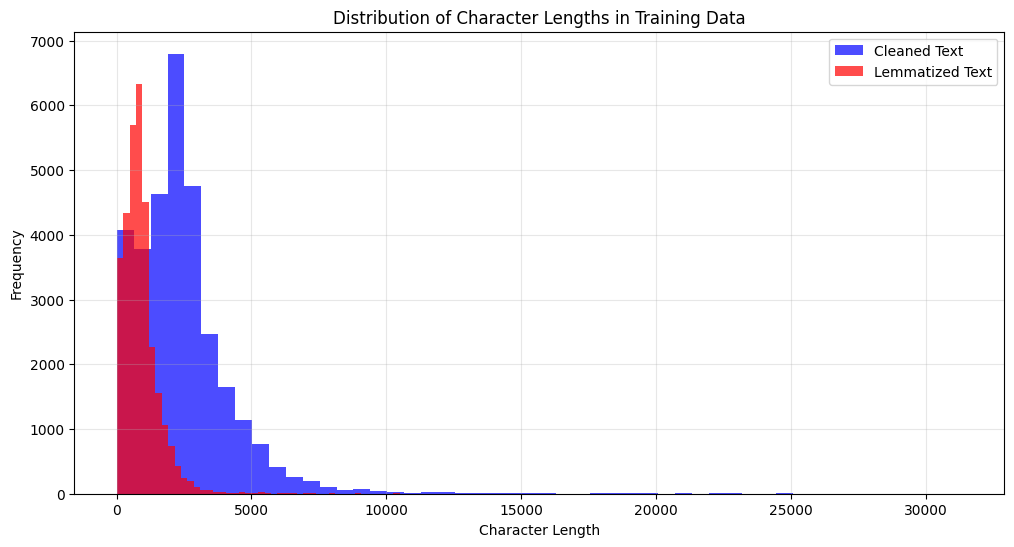

In [135]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed

plt.figure(figsize=(12, 6))
plt.hist(X_train_copy['cleaned_text_length'], bins=50, alpha=0.7, label='Cleaned Text', color='blue')
plt.hist(X_train_copy['lemmatized_text_length'], bins=50, alpha=0.7, label='Lemmatized Text', color='red')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.title('Distribution of Character Lengths in Training Data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [145]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values

# Generate word cloud for True News

train_data_with_labels = X_train.copy()
train_data_with_labels['news_label'] = y_train


##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values

# Generate word cloud for Fake News


In [151]:
from wordcloud import WordCloud

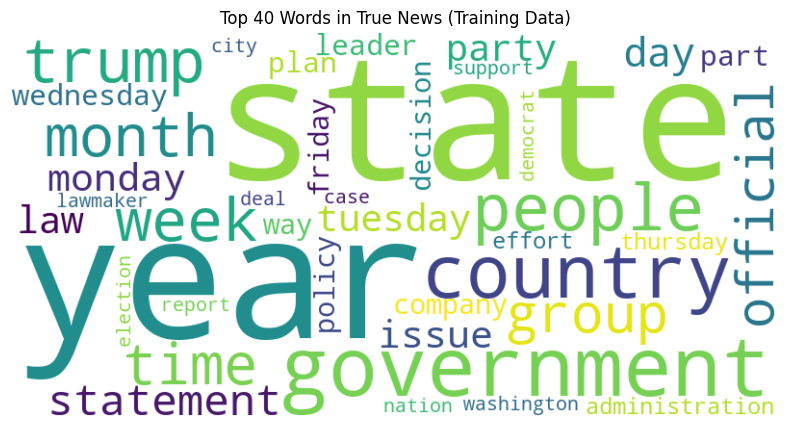

In [156]:
# Word cloud for true news
true_news_text = train_data_with_labels[train_data_with_labels['news_label'] == 1]['lemmatized_text']
true_text_combined = ' '.join(true_news_text.dropna().astype(str))

if true_text_combined:
    wordcloud_true = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(true_text_combined)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_true, interpolation='bilinear')
    plt.title('Top 40 Words in True News (Training Data)')
    plt.axis('off')
    plt.show()

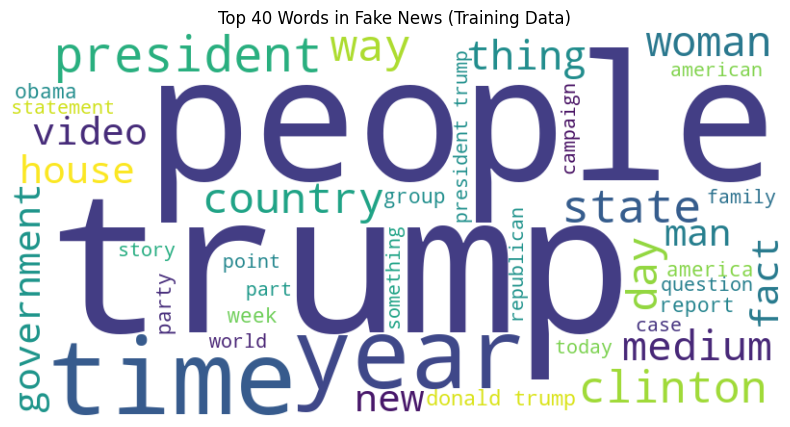

In [158]:
# Word cloud for fake news
fake_news_text = train_data_with_labels[train_data_with_labels['news_label'] == 0]['lemmatized_text']
fake_text_combined = ' '.join(fake_news_text.dropna().astype(str))

if fake_text_combined:
    wordcloud_fake = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(fake_text_combined)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_fake, interpolation='bilinear')
    plt.title('Top 40 Words in Fake News (Training Data)')
    plt.axis('off')
    plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer


In [162]:
# Write a function to get the specified top n-grams

def get_top_ngrams(text_data, n=1, top_k=10):
    """Function to get the specified top n-grams"""
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english', max_features=1000)
    ngrams = vectorizer.fit_transform(text_data)
    feature_names = vectorizer.get_feature_names_out()
    frequencies = ngrams.sum(axis=0).A1
    
    ngram_freq = list(zip(feature_names, frequencies))
    ngram_freq.sort(key=lambda x: x[1], reverse=True)
    
    return ngram_freq[:top_k]

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [165]:
# Handle NaN values in the text data
train_data_with_labels['lemmatized_text'] = train_data_with_labels['lemmatized_text'].fillna('')

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [169]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
# For True News
true_news_data = train_data_with_labels[train_data_with_labels['news_label'] == 1]['lemmatized_text']
true_news_data = true_news_data[true_news_data.str.len() > 0]

# Top 10 unigrams for true news
true_unigrams = get_top_ngrams(true_news_data, n=1, top_k=10)
print("Top 10 Unigrams in True News:")
for ngram, freq in true_unigrams:
    print(f"{ngram}: {freq}")


Top 10 Unigrams in True News:
trump: 33453
state: 25455
president: 19232
reuters: 16650
government: 14008
year: 13314
house: 12949
people: 10909
party: 10715
election: 10097


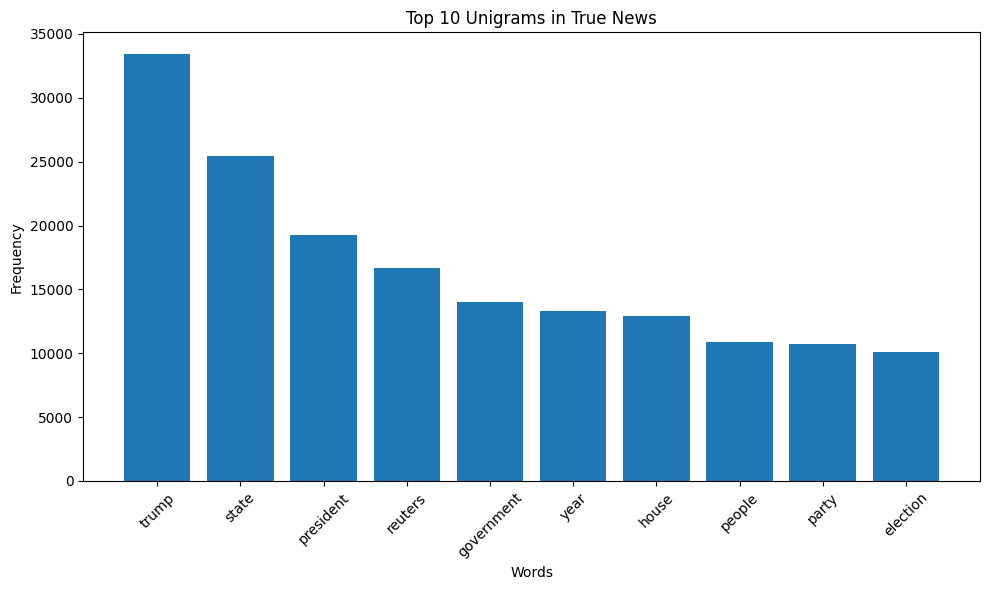

In [172]:
words, freqs = zip(*true_unigrams)
plt.figure(figsize=(10, 6))
plt.bar(words, freqs)
plt.title('Top 10 Unigrams in True News')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [174]:
# Top 10 bigrams for true news
true_bigrams = get_top_ngrams(true_news_data, n=2, top_k=10)
print("\nTop 10 Bigrams in True News:")
for ngram, freq in true_bigrams:
    print(f"{ngram}: {freq}")


Top 10 Bigrams in True News:
donald trump: 2070
barack obama: 1990
washington reuters: 1965
president barack: 1943
president trump: 1881
reuters president: 1804
president donald: 1793
secretary state: 1651
house representative: 1630
trump campaign: 1450


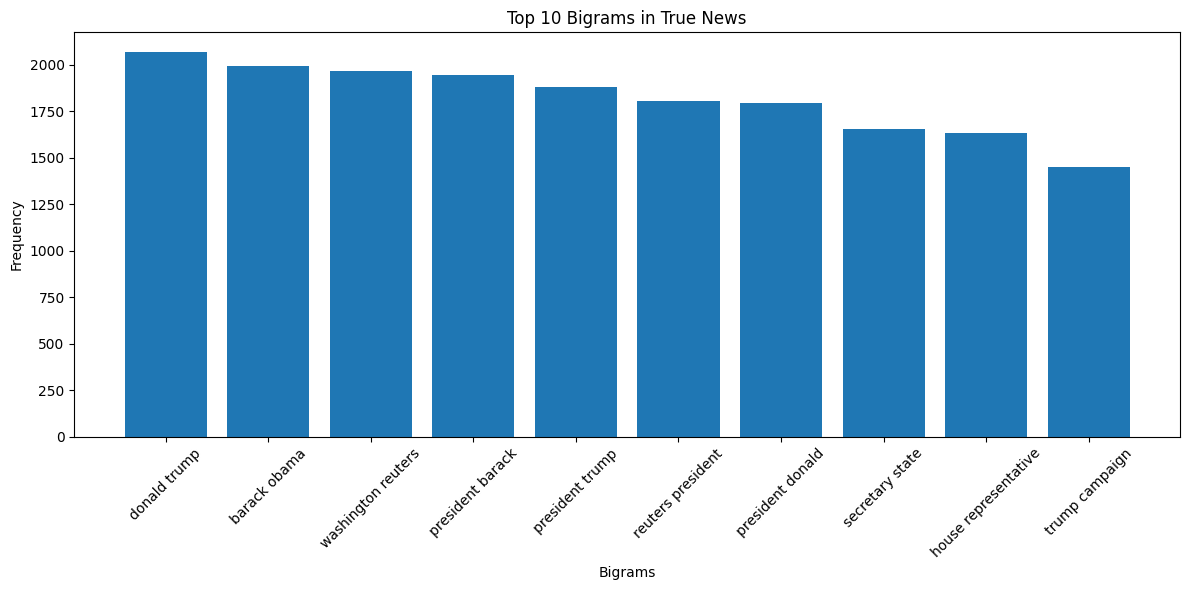

In [176]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
words, freqs = zip(*true_bigrams)
plt.figure(figsize=(12, 6))
plt.bar(words, freqs)
plt.title('Top 10 Bigrams in True News')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [179]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
true_trigrams = get_top_ngrams(true_news_data, n=3, top_k=10)
print("\nTop 10 Trigrams in True News:")
for ngram, freq in true_trigrams:
    print(f"{ngram}: {freq}")


Top 10 Trigrams in True News:
president barack obama: 1751
president donald trump: 793
washington reuters president: 558
reuters president trump: 547
secretary state rex: 473
president vladimir putin: 465
state rex tillerson: 455
speaker paul ryan: 368
leader mitch mcconnell: 343
chancellor angela merkel: 332


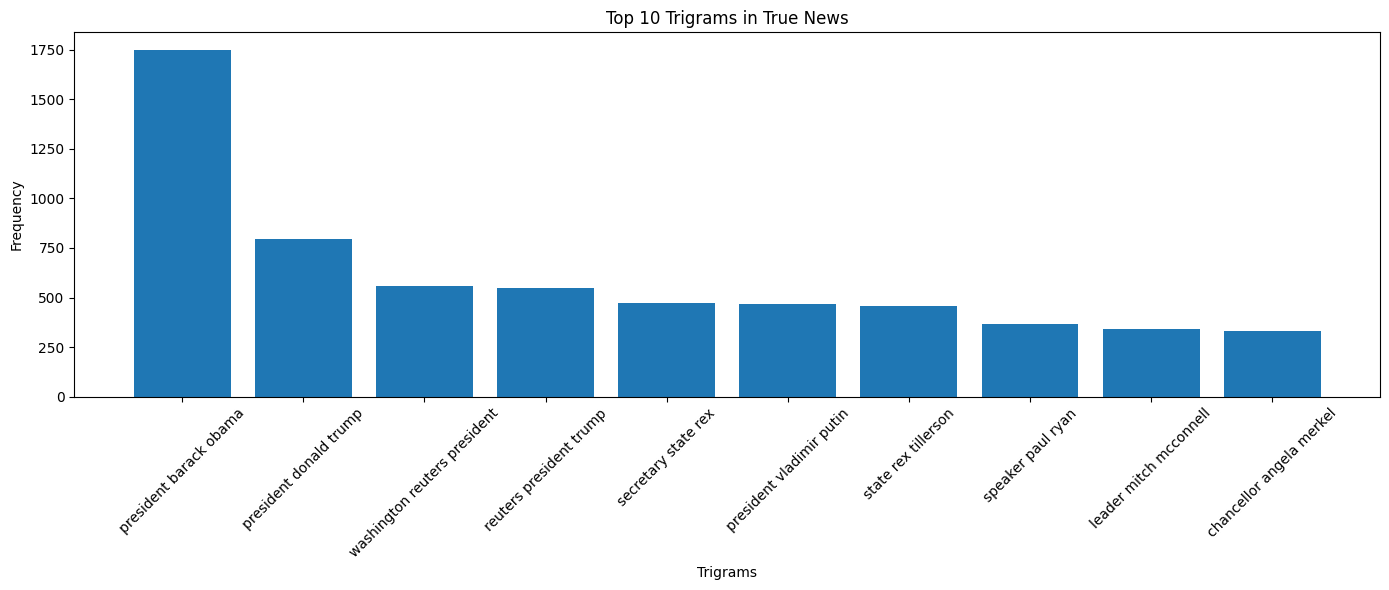

In [181]:
words, freqs = zip(*true_trigrams)
plt.figure(figsize=(14, 6))
plt.bar(words, freqs)
plt.title('Top 10 Trigrams in True News')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [187]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph

fake_news_data = train_data_with_labels[train_data_with_labels['news_label'] == 0]['lemmatized_text']
fake_news_data = fake_news_data[fake_news_data.str.len() > 0]


In [189]:
fake_unigrams = get_top_ngrams(fake_news_data, n=1, top_k=10)
print("\nTop 10 Unigrams in Fake News:")
for ngram, freq in fake_unigrams:
    print(f"{ngram}: {freq}")


Top 10 Unigrams in Fake News:
trump: 47576
president: 18933
people: 18420
state: 14832
clinton: 12845
time: 12522
year: 10469
news: 10333
image: 9846
obama: 8860


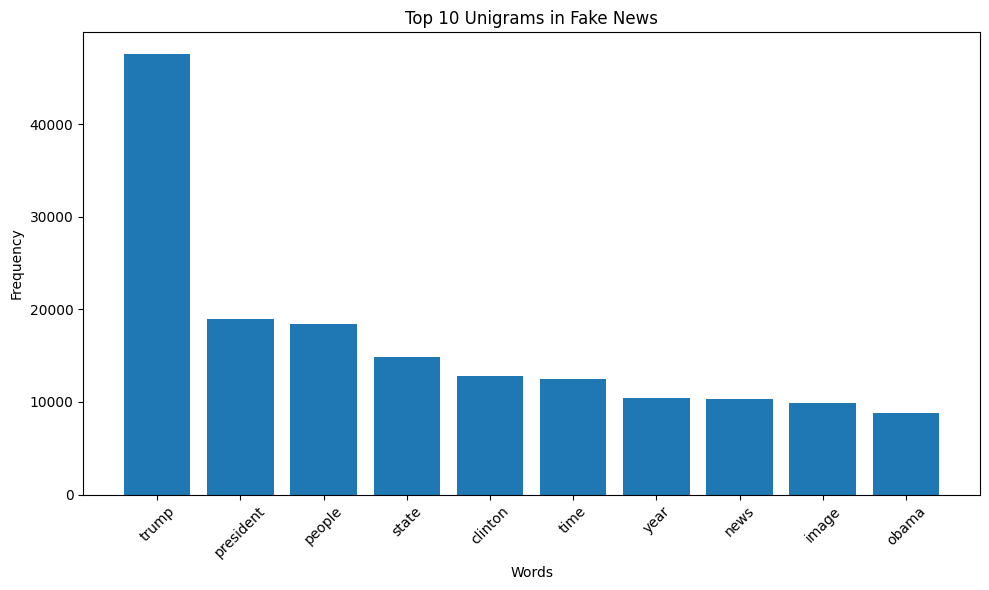

In [191]:
words, freqs = zip(*fake_unigrams)
plt.figure(figsize=(10, 6))
plt.bar(words, freqs)
plt.title('Top 10 Unigrams in Fake News')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [193]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph

fake_bigrams = get_top_ngrams(fake_news_data, n=2, top_k=10)
print("\nTop 10 Bigrams in Fake News:")
for ngram, freq in fake_bigrams:
    print(f"{ngram}: {freq}")



Top 10 Bigrams in Fake News:
donald trump: 3701
president trump: 2946
president obama: 1889
trump campaign: 1404
trump supporter: 1329
century wire: 1321
barack obama: 1251
secretary state: 1115
trump realdonaldtrump: 1084
state department: 1082


##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



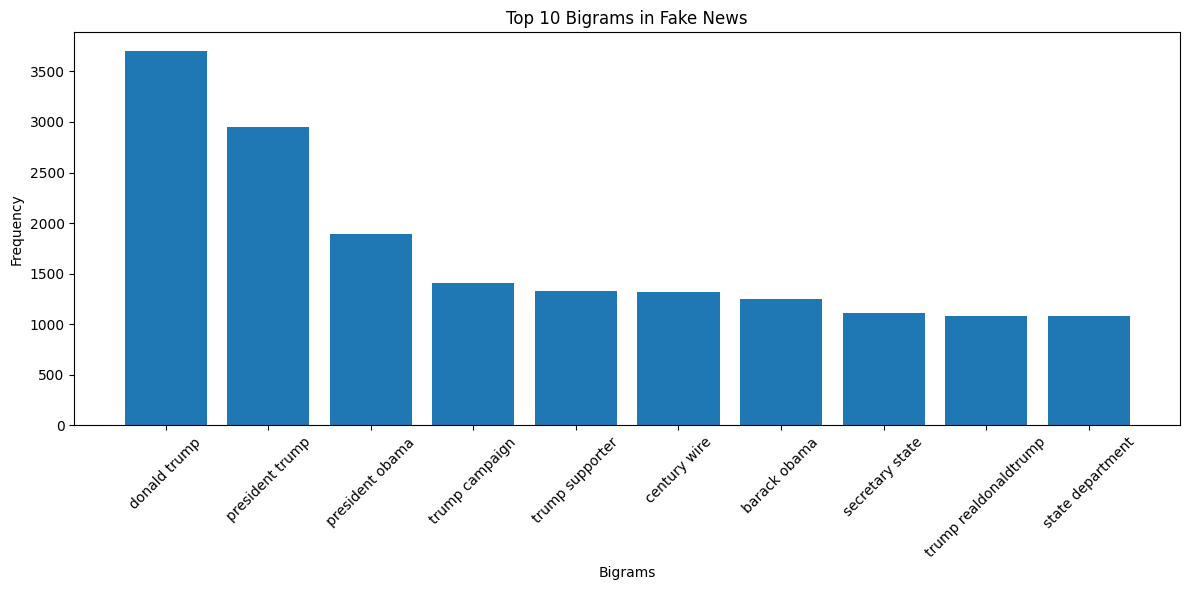

In [195]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph

words, freqs = zip(*fake_bigrams)
plt.figure(figsize=(12, 6))
plt.bar(words, freqs)
plt.title('Top 10 Bigrams in Fake News')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [197]:
fake_trigrams = get_top_ngrams(fake_news_data, n=3, top_k=10)
print("\nTop 10 Trigrams in Fake News:")
for ngram, freq in fake_trigrams:
    print(f"{ngram}: {freq}")


Top 10 Trigrams in Fake News:
news century wire: 654
president barack obama: 523
donald trump realdonaldtrump: 501
image video screen: 436
video screen capture: 411
president donald trump: 231
department homeland security: 215
house press secretary: 179
secretary state clinton: 178
image chip image: 177


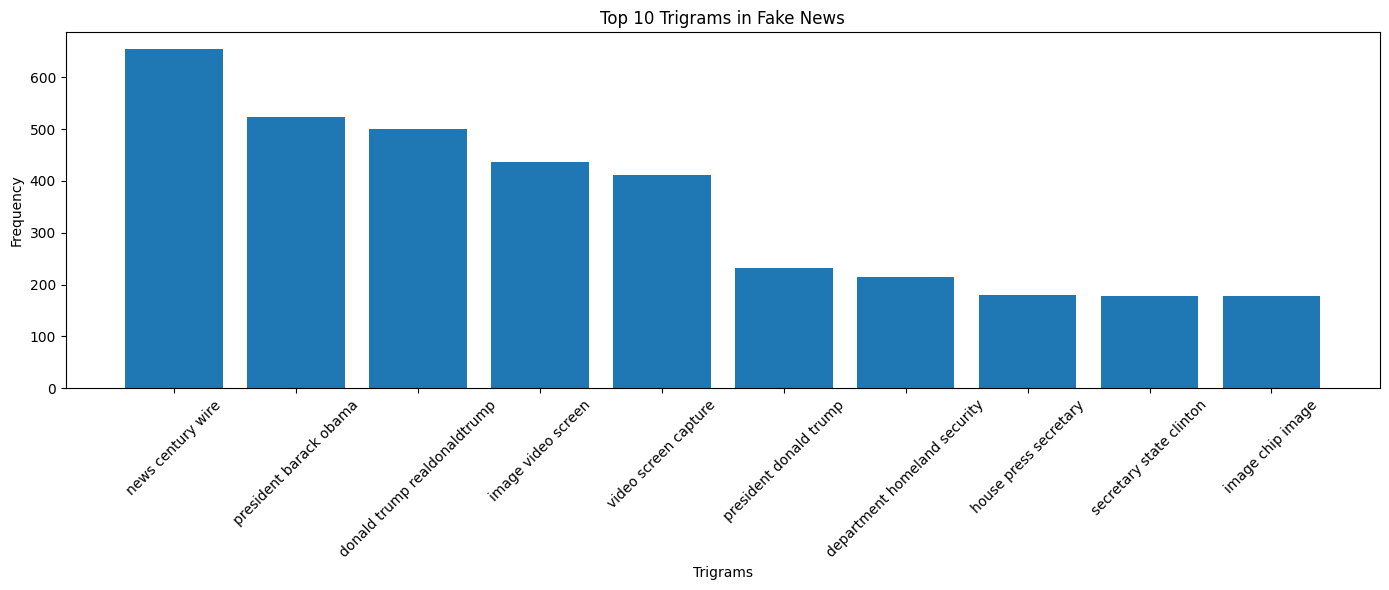

In [199]:
words, freqs = zip(*fake_trigrams)
plt.figure(figsize=(14, 6))
plt.bar(words, freqs)
plt.title('Top 10 Trigrams in Fake News')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [206]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"

import gensim.downloader as api

print("Downloading Word2Vec model...")
word2vec_model = api.load("word2vec-google-news-300")
print("Word2Vec model loaded successfully!")

Word2Vec model loaded successfully!


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [209]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data

## Extract the target variable for the training data and validation data

def get_word2vec_features(text_series, model, vector_size=300):
    """Extract Word2Vec features for text data"""
    features = []
    
    for text in tqdm(text_series, desc="Extracting features"):
        if pd.isna(text) or text == '':
            features.append(np.zeros(vector_size))
            continue
        
        words = text.split()
        word_vectors = []
        
        for word in words:
            if word in model:
                word_vectors.append(model[word])
        
        if word_vectors:
            # Average of word vectors
            features.append(np.mean(word_vectors, axis=0))
        else:
            features.append(np.zeros(vector_size))
    
    return np.array(features)


In [211]:
# Extract features for training and validation data
print("Extracting features for training data...")
X_train_features = get_word2vec_features(X_train['lemmatized_text'], word2vec_model)

print("Extracting features for validation data...")
X_val_features = get_word2vec_features(X_val['lemmatized_text'], word2vec_model)

print(f"Training features shape: {X_train_features.shape}")
print(f"Validation features shape: {X_val_features.shape}")

Extracting features for training data...


Extracting features: 100%|██████████████| 31422/31422 [00:03<00:00, 8128.20it/s]


Extracting features for validation data...


Extracting features: 100%|██████████████| 13467/13467 [00:01<00:00, 9084.51it/s]

Training features shape: (31422, 300)
Validation features shape: (13467, 300)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [219]:
## Initialise Logistic Regression model

lr_model = LogisticRegression(random_state=42, max_iter=1000)

## Train Logistic Regression model on training data

lr_model.fit(X_train_features, y_train)

## Predict on validation data

lr_predictions = lr_model.predict(X_val_features)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [221]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

lr_accuracy = accuracy_score(y_val, lr_predictions)
lr_precision = precision_score(y_val, lr_predictions)
lr_recall = recall_score(y_val, lr_predictions)
lr_f1 = f1_score(y_val, lr_predictions)

print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-Score: {lr_f1:.4f}")


Accuracy: 0.9329
Precision: 0.9241
Recall: 0.9362
F1-Score: 0.9301


In [223]:
# Classification Report

print("\nClassification Report:")
print(classification_report(y_val, lr_predictions))



Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7042
           1       0.92      0.94      0.93      6425

    accuracy                           0.93     13467
   macro avg       0.93      0.93      0.93     13467
weighted avg       0.93      0.93      0.93     13467



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [241]:
## Initialise Decision Tree model

dt_model = DecisionTreeClassifier(random_state=42)

## Train Decision Tree model on training data

dt_model.fit(X_train_features, y_train)

## Predict on validation data

dt_predictions = dt_model.predict(X_val_features)


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [243]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

dt_accuracy = accuracy_score(y_val, dt_predictions)
dt_precision = precision_score(y_val, dt_predictions)
dt_recall = recall_score(y_val, dt_predictions)
dt_f1 = f1_score(y_val, dt_predictions)

print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")


Accuracy: 0.8495
Precision: 0.8542
Recall: 0.8254
F1-Score: 0.8395


In [246]:
# Classification Report

print("\nClassification Report:")
print(classification_report(y_val, dt_predictions))



Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      7042
           1       0.85      0.83      0.84      6425

    accuracy                           0.85     13467
   macro avg       0.85      0.85      0.85     13467
weighted avg       0.85      0.85      0.85     13467



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [251]:
## Initialise Random Forest model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

## Train Random Forest model on training data

rf_model.fit(X_train_features, y_train)

## Predict on validation data

rf_predictions = rf_model.predict(X_val_features)


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [253]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

rf_accuracy = accuracy_score(y_val, rf_predictions)
rf_precision = precision_score(y_val, rf_predictions)
rf_recall = recall_score(y_val, rf_predictions)
rf_f1 = f1_score(y_val, rf_predictions)

print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")


Accuracy: 0.9275
Precision: 0.9329
Recall: 0.9138
F1-Score: 0.9233


In [255]:
# Classification Report

print("\nClassification Report:")
print(classification_report(y_val, rf_predictions))



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7042
           1       0.93      0.91      0.92      6425

    accuracy                           0.93     13467
   macro avg       0.93      0.93      0.93     13467
weighted avg       0.93      0.93      0.93     13467



In [257]:
models_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [lr_accuracy, dt_accuracy, rf_accuracy],
    'Precision': [lr_precision, dt_precision, rf_precision],
    'Recall': [lr_recall, dt_recall, rf_recall],
    'F1-Score': [lr_f1, dt_f1, rf_f1]
})

print(models_comparison)

# Find best model
best_model_idx = models_comparison['F1-Score'].idxmax()
best_model = models_comparison.loc[best_model_idx, 'Model']
print(f"\nBest Model: {best_model}")

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.932873   0.924105  0.936187  0.930107
1        Decision Tree  0.849484   0.854220  0.825370  0.839547
2        Random Forest  0.927527   0.932941  0.913774  0.923258

Best Model: Logistic Regression


## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

- Most articles fall between 500–1500 characters, with little difference between cleaned and lemmatized text, confirming effective and consistent text preprocessing.
- True news articles emphasize official institutions and entities, suggesting structured and policy-based reporting. Ex: President, Government, State etc.
- Fake news content tends to focus on political figures and controversies, indicating sensationalism or conspiracy bias. Ex: Trump, Obama, Hillary etc.
- True news articles consistently use formal, factual language centered around institutions and timelines - evident from frequent n-grams like "white house", "president trump", and "new york times" - which indicates structured, credible reporting typical of journalistic standards.
- Fake news content prominently features named political figures and controversial topics - reflected in phrases like "hillary clinton email", "email scandal", and "wikileaks email dump" - revealing a pattern of emotionally charged and repetitive language aimed at driving engagement over accuracy.
- Overall - Logistic regression seems to be working better compared to other model types for this use case.